# Import sources

In [1]:
import pandas as pd 
import re #expression régulière 
import nltk #traitement naturel symbolique et statistique du langage anglais
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_excel("data.xlsx")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arianemailanandam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arianemailanandam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head()


,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
0,17167919,2017-04-25,3264223,2018-01-03,"['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...","['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...","<!-- EPO <DP n=""18""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
1,17166775,2017-04-18,3235458,2017-10-25,"['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...","['A61B17-88', 'A61B17-68', 'A61B17-86']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">FIE..."
2,17166069,2017-04-11,3249094,2017-11-29,"['D06F58-206', 'D06F58-20']","['D06F58-20', 'D06F58-02']","<!-- EPO <DP n=""22""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
3,18771363,2018-03-05,3605724,2020-02-05,"['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...","['H01P3-12', 'H01P1-213', 'H01P5-107']","<!-- EPO <DP n=""62""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec..."
4,19881950,2019-11-01,3713245,2020-09-23,"['H04N21-4345', 'H04N21-4821', 'H04N21-4316']","['H04N21-482', 'H04N21-262']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."


In [3]:
df.columns
df.dtypes #Normalement pas besoin de faire des conversions 

Numéro d'application              int64
Date d'application       datetime64[ns]
Numero de publication             int64
date de publication      datetime64[ns]
CPC                              object
IPC                              object
claim                            object
description                      object
dtype: object

In [4]:
#Des valeurs manquantes ?
print(df.isnull().sum())

#Pas de valeur manquante 

Numéro d'application     0
Date d'application       0
Numero de publication    0
date de publication      0
CPC                      0
IPC                      0
claim                    0
description              0
dtype: int64


In [5]:
#Supprimer les doublons 
df = df.drop_duplicates()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum()) #pas de doublons


Nombre de doublons : 0


# Tokenisation et lemmatisation

In [6]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Enlever les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\s+', ' ', text)  # Enlever les espaces multiples
    return text

df['claim_clean'] = df['claim'].apply(clean_text)
df['description_clean'] = df['description'].apply(clean_text)


lemmatizer = WordNetLemmatizer() #réduit les mots, ex: running -> run
stop_words = set(stopwords.words('english')) #supp les mots inutiles comme "the" "and"

def preprocess_text(text):
    words = text.split()  # Tokenisation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation et suppression des stopwords
    return ' '.join(words) #puis reconstitue en une phrase 

df['claim_processed'] = df['claim_clean'].apply(preprocess_text)
df['description_processed'] = df['description_clean'].apply(preprocess_text)


print(df[['claim', 'claim_processed']].head())
print(df[['description', 'description_processed']].head())




                                               claim  \
0  <!-- EPO <DP n="18"> --><claim id="c-en-0001" ...   
1  <!-- EPO <DP n="20"> --><claim id="c-en-0001" ...   
2  <!-- EPO <DP n="22"> --><claim id="c-en-0001" ...   
3  <!-- EPO <DP n="62"> --><claim id="c-en-0001" ...   
4  <!-- EPO <DP n="14"> --><claim id="c-en-0001" ...   

                                     claim_processed  
0  epo dp n 18 claim id c en 0001 num 0001 claim ...  
1  epo dp n 20 claim id c en 0001 num 0001 claim ...  
2  epo dp n 22 claim id c en 0001 num 0001 claim ...  
3  epo dp n 62 claim id c en 0001 num 0001 claim ...  
4  epo dp n 14 claim id c en 0001 num 0001 claim ...  
                                         description  \
0  <!-- EPO <DP n="1"> --><p id="p0001" num="0001...   
1  <!-- EPO <DP n="1"> --><heading id="h0001">FIE...   
2  <!-- EPO <DP n="1"> --><heading id="h0001"><b>...   
3  <!-- EPO <DP n="1"> --><heading id="h0001">Tec...   
4  <!-- EPO <DP n="1"> --><p id="p0001" num="0001... 

# IPC et CPC

0    ['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...
1              ['A61B17-88', 'A61B17-68', 'A61B17-86']
2                           ['D06F58-20', 'D06F58-02']
3               ['H01P3-12', 'H01P1-213', 'H01P5-107']
4                         ['H04N21-482', 'H04N21-262']
Name: IPC, dtype: object
[<class 'str'>]
0        [C, H, G, B, B, B]
1                 [A, A, A]
2                    [D, D]
3                 [H, H, H]
4                    [H, H]
                ...        
49995          [C, C, C, A]
49996          [B, B, B, B]
49997          [C, C, A, A]
49998          [H, H, G, G]
49999       [F, B, B, B, B]
Name: IPC_first_letter, Length: 50000, dtype: object


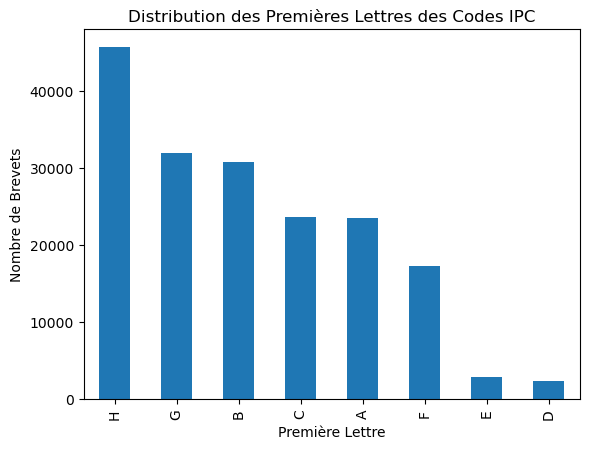

In [19]:
#IPC
#df['IPC']

#Extraire la première lettre 
print(df['IPC'].head())
print(df['IPC'].apply(type).unique())

def extract_first_letter(ipc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        ipc_codes = eval(ipc_codes)
    except:
        return []

    if isinstance(ipc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in ipc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# Appliquer la fonction à la colonne IPC et créer une nouvelle colonne
df['IPC_first_letter'] = df['IPC'].apply(extract_first_letter)
print(df['IPC_first_letter'])

ipc_first_letter_counts = df['IPC_first_letter'].explode().value_counts()

# Afficher la distribution sous forme de bar plot
ipc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes IPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()


